# **Linear regression using pytorch*

import all libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import our dataset

In [33]:
data = pd.read_csv("/content/drive/MyDrive/ML_FOLDER/pytorch/data/fuel.csv")
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


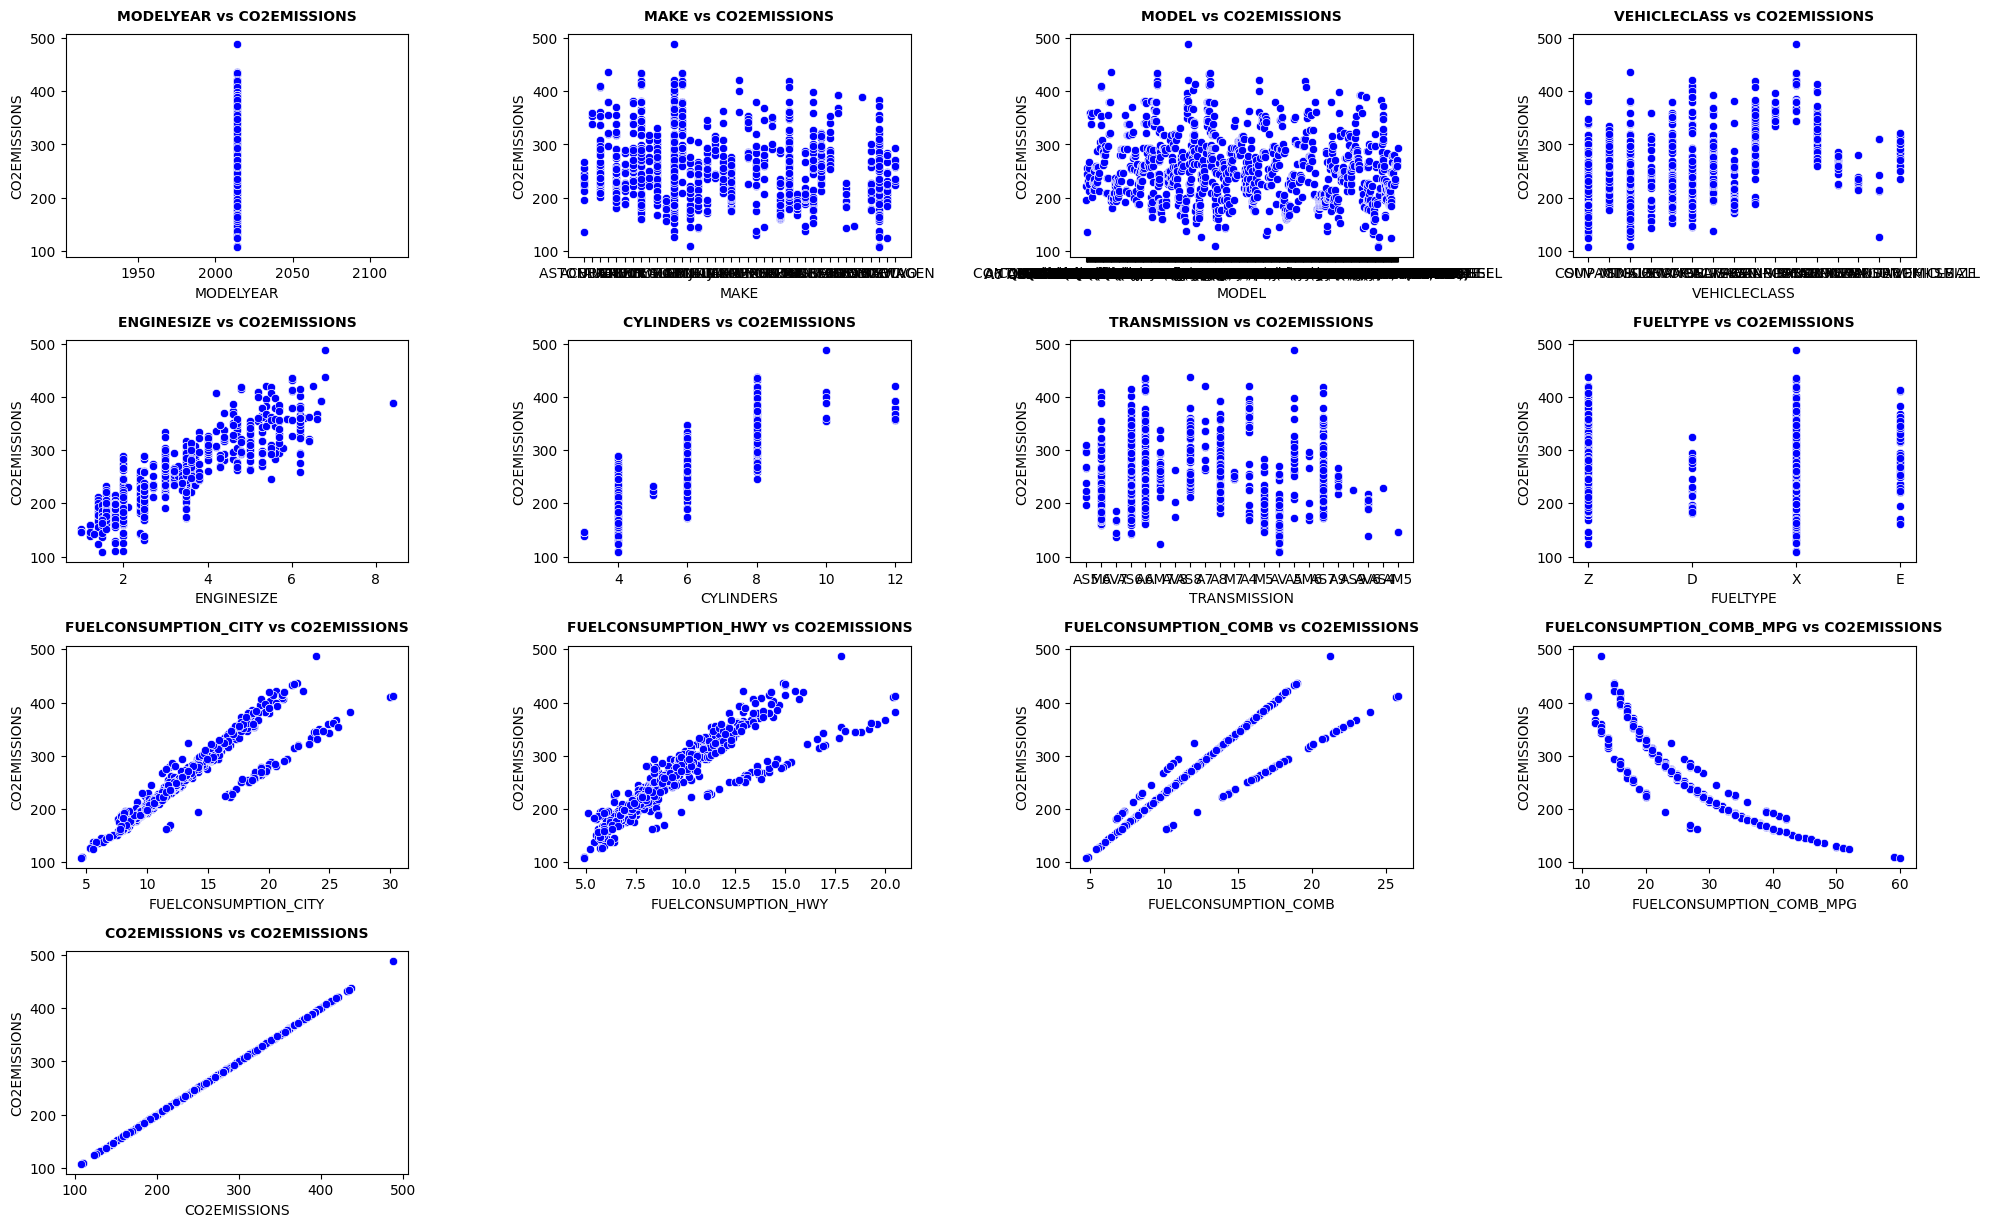

In [37]:
cols = data.columns
plt.figure(figsize=(20, 15))
for index, column in enumerate(cols):
    plt.subplot(5, 4, index + 1)
    sns.scatterplot(x=column, y='CO2EMISSIONS', data=data, color="blue")
    plt.title(f"{column} vs CO2EMISSIONS", fontweight="black", size=10, pad=10)
    plt.tight_layout()
plt.show()

we are going to performe our model base on FUELCONSUMPTION_HWY and  CO2EMISSIONS

In [41]:
data = data[['CO2EMISSIONS', 'FUELCONSUMPTION_HWY']]


In [42]:
data.shape

(1067, 2)

# spliting data to train and test sets

In [43]:

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data.drop('CO2EMISSIONS',axis=1).values,
                                                    data['CO2EMISSIONS'].values, test_size=0.2,
                                                    random_state=33)

# Update the training loop to use training data
X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.FloatTensor(train_y).reshape(-1, 1)  # Change to torch.FloatTensor
y_test = torch.FloatTensor(test_y).reshape(-1, 1)  # Change to torch.FloatTensor


In [44]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 853
Labels: tensor([108., 110., 124., 136., 138., 143., 145., 147., 152., 156., 159., 161.,
        162., 163., 165., 166., 168., 170., 172., 173., 175., 177., 179., 181.,
        182., 184., 186., 189., 191., 192., 193., 194., 196., 197., 198., 200.,
        202., 205., 207., 209., 212., 213., 214., 216., 218., 221., 222., 223.,
        224., 225., 227., 228., 229., 230., 232., 235., 237., 239., 242., 244.,
        246., 248., 250., 251., 253., 254., 255., 256., 258., 259., 260., 262.,
        264., 265., 267., 269., 270., 271., 272., 274., 276., 277., 278., 280.,
        281., 283., 285., 286., 288., 290., 292., 294., 297., 299., 301., 304.,
        306., 308., 310., 313., 315., 317., 320., 322., 324., 327., 329., 331.,
        334., 336., 338., 340., 342., 344., 345., 346., 347., 350., 352., 354.,
        356., 359., 360., 361., 362., 363., 366., 368., 370., 373., 377., 380.,
        382., 384., 386., 389., 393., 396., 398., 400., 402., 407., 409., 411.,
        413.,

In [45]:
X_train.size()

torch.Size([853, 1])

In [46]:
y_train.size()

torch.Size([853, 1])

# Define the model

In [48]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)


In [49]:
input_dim = X_train.size(1)
output_dim = y_train.size(1)
model = LinearRegression(input_dim, output_dim)

In [50]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model

In [51]:

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 5266.98583984375
Epoch [200/1000], Loss: 1497.7725830078125
Epoch [300/1000], Loss: 1235.52734375
Epoch [400/1000], Loss: 1180.7921142578125
Epoch [500/1000], Loss: 1148.59521484375
Epoch [600/1000], Loss: 1125.7147216796875
Epoch [700/1000], Loss: 1109.189453125
Epoch [800/1000], Loss: 1097.239501953125
Epoch [900/1000], Loss: 1088.597412109375
Epoch [1000/1000], Loss: 1082.3472900390625


# EVALUTE THE MODEL

In [52]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 893.5248413085938


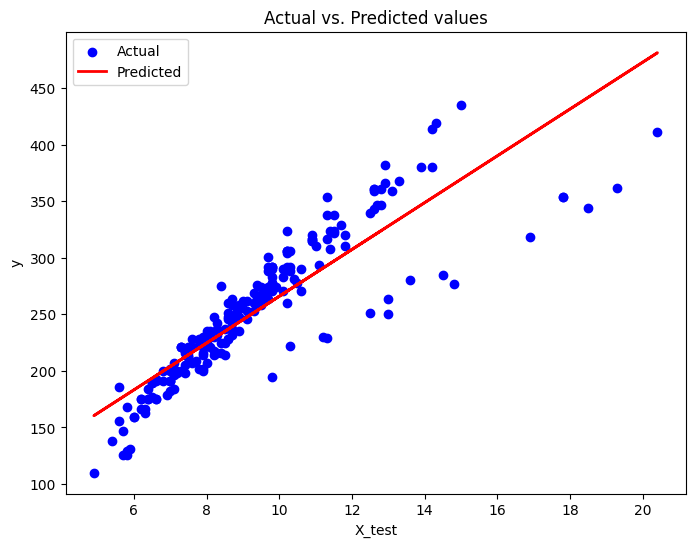

In [53]:
X_test_np = X_test.numpy()
y_test_np = y_test.numpy()
y_pred_np = y_pred.numpy()

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test_np, y_test_np, color='blue', label='Actual')
plt.plot(X_test_np, y_pred_np, color='red', linewidth=2, label='Predicted')
plt.xlabel('X_test')
plt.ylabel('y')
plt.title('Actual vs. Predicted values')
plt.legend()
plt.show()